In [141]:
#!pip install python-binance pandas mplfinance
#!pip install pandas-datareader


In [3]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np
import csv
from IPython.display import display
from textblob import TextBlob
%matplotlib inline

Binance API Data

In [4]:
client = Client(apikey, secret)

In [ ]:
tickers =client.get_all_tickers()
tickers

In [6]:
tickers[558]

{'symbol': 'DOGEUSDT', 'price': '0.13980000'}

In [7]:
ticker_df = pd.DataFrame(tickers)

In [8]:
ticker_df.set_index('symbol', inplace=True)

In [9]:
ticker_df.loc['DOGEUSDT']

price    0.13980000
Name: DOGEUSDT, dtype: object

In [10]:
historical = client.get_historical_klines('DOGEUSDT', client.KLINE_INTERVAL_1DAY, '1 jan 2016')

In [ ]:
historical


In [12]:
hist_df = pd.DataFrame(historical)

In [13]:
hist_df.head()



,0,1,2,3,4,5,6,7,8,9,10,11
0,1562284800000,0.00449000,0.00460000,0.00355000,0.00387010,1928297660.00000000,1562371199999,7506289.39817290,18589,858403324.00000000,3336426.01151920,0
1,1562371200000,0.00387410,0.00394260,0.00336520,0.00350000,1010744287.00000000,1562457599999,3692804.08878380,17250,522724122.00000000,1908499.50964960,0
2,1562457600000,0.00350400,0.00365000,0.00340000,0.00353770,530613992.00000000,1562543999999,1860353.07168390,9394,275110757.00000000,965093.40977300,0
3,1562544000000,0.00353780,0.00356180,0.00340000,0.00345800,308445688.00000000,1562630399999,1078072.00566180,4958,159456967.00000000,558024.17586270,0
4,1562630400000,0.00346200,0.00358200,0.00335640,0.00345450,253375582.00000000,1562716799999,878528.33377630,5690,115809520.00000000,402047.29506700,0


In [14]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Time', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore'] 

In [15]:

hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Time,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1562284800000,0.00449000,0.00460000,0.00355000,0.00387010,1928297660.00000000,1562371199999,7506289.39817290,18589,858403324.00000000,3336426.01151920,0
1,1562371200000,0.00387410,0.00394260,0.00336520,0.00350000,1010744287.00000000,1562457599999,3692804.08878380,17250,522724122.00000000,1908499.50964960,0
2,1562457600000,0.00350400,0.00365000,0.00340000,0.00353770,530613992.00000000,1562543999999,1860353.07168390,9394,275110757.00000000,965093.40977300,0
3,1562544000000,0.00353780,0.00356180,0.00340000,0.00345800,308445688.00000000,1562630399999,1078072.00566180,4958,159456967.00000000,558024.17586270,0
4,1562630400000,0.00346200,0.00358200,0.00335640,0.00345450,253375582.00000000,1562716799999,878528.33377630,5690,115809520.00000000,402047.29506700,0


In [16]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')


In [17]:
hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Time,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2019-07-05,0.00449000,0.00460000,0.00355000,0.00387010,1928297660.00000000,2019-07-05 23:59:59.999000064,7506289.39817290,18589,858403324.00000000,3336426.01151920,0
1,2019-07-06,0.00387410,0.00394260,0.00336520,0.00350000,1010744287.00000000,2019-07-06 23:59:59.999000064,3692804.08878380,17250,522724122.00000000,1908499.50964960,0
2,2019-07-07,0.00350400,0.00365000,0.00340000,0.00353770,530613992.00000000,2019-07-07 23:59:59.999000064,1860353.07168390,9394,275110757.00000000,965093.40977300,0
3,2019-07-08,0.00353780,0.00356180,0.00340000,0.00345800,308445688.00000000,2019-07-08 23:59:59.999000064,1078072.00566180,4958,159456967.00000000,558024.17586270,0
4,2019-07-09,0.00346200,0.00358200,0.00335640,0.00345450,253375582.00000000,2019-07-09 23:59:59.999000064,878528.33377630,5690,115809520.00000000,402047.29506700,0


In [18]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Time', 'TB Base Volume', 'TB Quote Volume']

In [19]:
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)


In [20]:
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Time,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
1015,2022-04-15,0.1442,0.1498,0.1418,0.1458,1.414075e+09,2022-04-15 23:59:59.999000064,2.064217e+08,242481,723331407.0,1.056052e+08,0
1016,2022-04-16,0.1458,0.1480,0.1414,0.1435,7.472020e+08,2022-04-16 23:59:59.999000064,1.079207e+08,126459,360742976.0,5.209478e+07,0
1017,2022-04-17,0.1435,0.1450,0.1383,0.1392,6.931967e+08,2022-04-17 23:59:59.999000064,9.879824e+07,118303,340769559.0,4.858119e+07,0
1018,2022-04-18,0.1392,0.1405,0.1327,0.1402,1.219207e+09,2022-04-18 23:59:59.999000064,1.666317e+08,172568,596502256.0,8.154899e+07,0
1019,2022-04-19,0.1401,0.1415,0.1391,0.1397,2.151006e+08,2022-04-19 23:59:59.999000064,3.012855e+07,30988,105624900.0,1.479590e+07,0


In [21]:
import mplfinance as mpf

In [22]:
hist_df.set_index('Close Time').tail(1460)

,Open Time,Open,High,Low,Close,Volume,Quote Asset Time,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Close Time,,,,,,,,,,,
2019-07-05 23:59:59.999000064,2019-07-05,0.004490,0.004600,0.003550,0.003870,1.928298e+09,7.506289e+06,18589,858403324.0,3.336426e+06,0
2019-07-06 23:59:59.999000064,2019-07-06,0.003874,0.003943,0.003365,0.003500,1.010744e+09,3.692804e+06,17250,522724122.0,1.908500e+06,0
2019-07-07 23:59:59.999000064,2019-07-07,0.003504,0.003650,0.003400,0.003538,5.306140e+08,1.860353e+06,9394,275110757.0,9.650934e+05,0
2019-07-08 23:59:59.999000064,2019-07-08,0.003538,0.003562,0.003400,0.003458,3.084457e+08,1.078072e+06,4958,159456967.0,5.580242e+05,0
2019-07-09 23:59:59.999000064,2019-07-09,0.003462,0.003582,0.003356,0.003455,2.533756e+08,8.785283e+05,5690,115809520.0,4.020473e+05,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-15 23:59:59.999000064,2022-04-15,0.144200,0.149800,0.141800,0.145800,1.414075e+09,2.064217e+08,242481,723331407.0,1.056052e+08,0
2022-04-16 23:59:59.999000064,2022-04-16,0.145800,0.148000,0.141400,0.143500,7.472020e+08,1.079207e+08,126459,360742976.0,5.209478e+07,0
2022-04-17 23:59:59.999000064,2022-04-17,0.143500,0.145000,0.138300,0.139200,6.931967e+08,9.879824e+07,118303,340769559.0,4.858119e+07,0


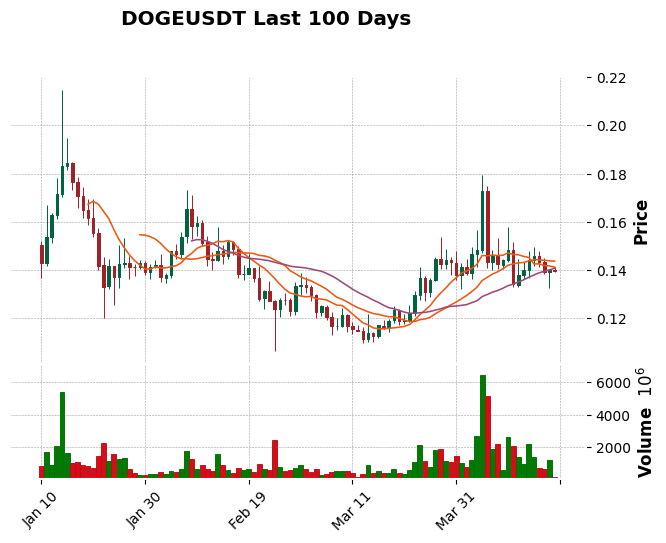

In [23]:
mpf.plot(hist_df.set_index('Open Time').tail(100), 
        type='candle', style='charles', 
        volume=True, 
        title='DOGEUSDT Last 100 Days', 
        mav=(10,20,30))

In [24]:
start = dt.datetime(2020,12,1)
end = dt.datetime(2021,11,1)


In [25]:
doge = web.DataReader('DOGE-USD', 'yahoo', start, end)

doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-01,0.003572,0.003269,0.003551,0.003335,80163603,0.003335
2020-12-02,0.003436,0.003293,0.003335,0.003374,58705661,0.003374
2020-12-03,0.003500,0.003352,0.003375,0.003428,47907032,0.003428
2020-12-04,0.003447,0.003285,0.003429,0.003298,45062222,0.003298
2020-12-05,0.003414,0.003268,0.003297,0.003397,43386583,0.003397
...,...,...,...,...,...,...
2021-10-29,0.306312,0.279771,0.299964,0.287853,5866664030,0.287853
2021-10-30,0.294647,0.259888,0.287764,0.268345,3637334331,0.268345
2021-10-31,0.284707,0.252614,0.269239,0.280244,4224104205,0.280244


In [26]:
start = dt.datetime(2021,5,13)
end = dt.datetime(2021,5,15)

In [27]:
doge = web.DataReader('DOGE-USD', 'yahoo', start, end)
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-13,0.519461,0.357175,0.392176,0.490374,18663174069,0.490374
2021-05-14,0.589690,0.464622,0.487070,0.559604,20466177002,0.559604
2021-05-15,0.562676,0.491299,0.559668,0.507972,9836892944,0.507972
2021-05-16,0.548145,0.451023,0.507910,0.514895,9541552064,0.514895


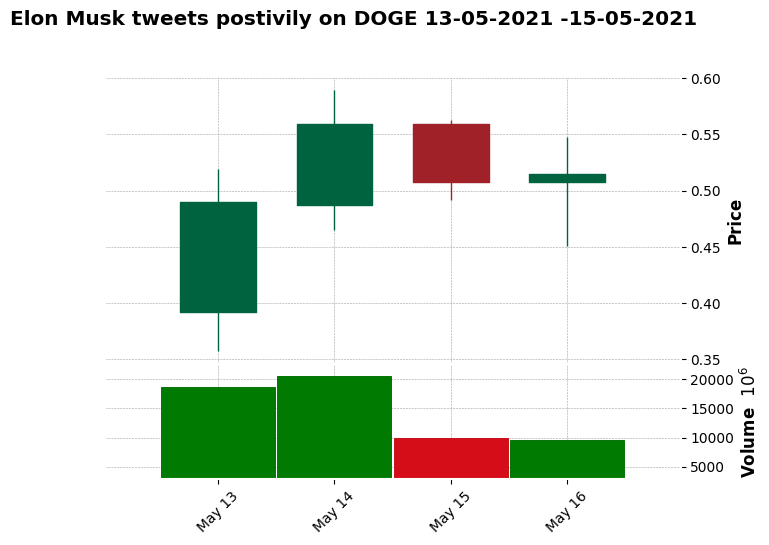

In [28]:
mpf.plot(doge, type = "candle" , volume=True, style="charles", title='Elon Musk tweets postivily on DOGE 13-05-2021 -15-05-2021  ')

In [29]:
start = dt.datetime(2021,5,9)
end = dt.datetime(2021,5,10)


In [30]:
doge = web.DataReader('DOGE-USD', 'yahoo', start, end)
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-09,0.697625,0.425706,0.635820,0.570070,46138063928,0.570070
2021-05-10,0.569687,0.421291,0.569687,0.449964,16514521828,0.449964
2021-05-11,0.546651,0.445034,0.450488,0.495231,14566975476,0.495231


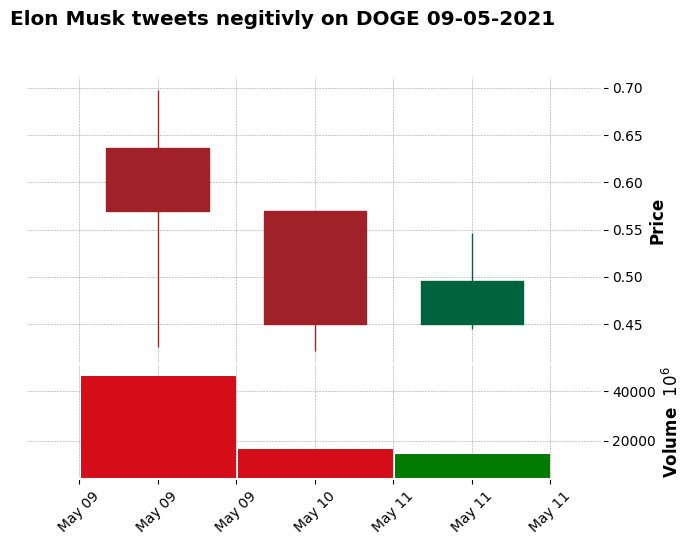

In [31]:
mpf.plot(doge, type = "candle" , volume=True, style="charles", title='Elon Musk tweets negitivly on DOGE 09-05-2021')

In [32]:
start = dt.datetime(2021,8,9)
end = dt.datetime(2021,9,9)

In [33]:
doge = web.DataReader('DOGE-USD', 'yahoo', start, end)
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-09,0.266265,0.231410,0.240122,0.256897,4607903346,0.256897
2021-08-10,0.262791,0.245352,0.256366,0.257325,3424415504,0.257325
2021-08-11,0.282482,0.256382,0.257424,0.265263,4732068476,0.265263
2021-08-12,0.294142,0.252775,0.264853,0.263921,5264857508,0.263921
2021-08-13,0.287188,0.261907,0.264249,0.286808,3565092106,0.286808
2021-08-14,0.298456,0.277154,0.286801,0.293113,4677579997,0.293113
2021-08-15,0.348722,0.287063,0.294086,0.341441,8046171669,0.341441
2021-08-16,0.350953,0.310828,0.340165,0.320715,6681324187,0.320715
2021-08-17,0.339462,0.295763,0.319631,0.299442,5699700481,0.299442


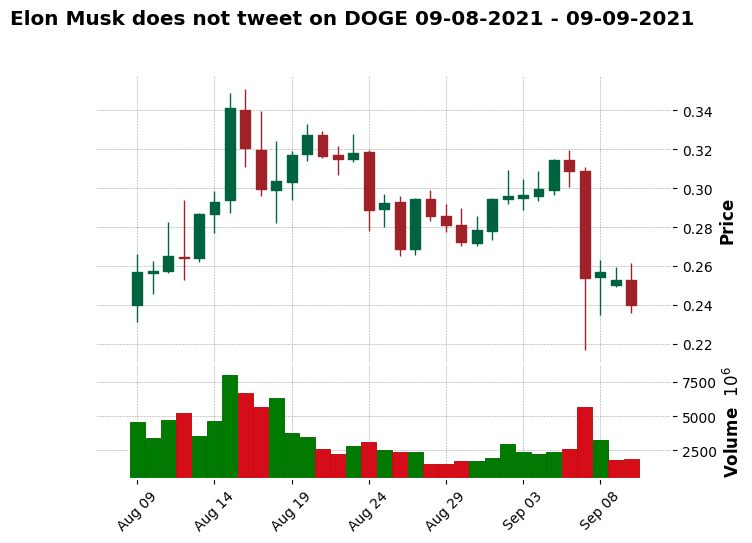

In [34]:
mpf.plot(doge, type = "candle" , volume=True, style="charles", title='Elon Musk does not tweet on DOGE 09-08-2021 - 09-09-2021')

In [35]:
df = pd.read_csv('Dogecoin Historical Data.csv', usecols=['Date', 'High'])
df['Date'] = pd.to_datetime(df['Date'])
df['Pct change'] = df['High'].pct_change().multiply(100)

tweets_df = pd.read_csv('53tweets.csv', usecols=['Date', 'Tweet', 'Time'])
tweets_df['Offset'] = tweets_df['Time'].apply(lambda time: '1 days' if time.find('pm') > -1 else 0)
tweets_df['Date'] = (pd.to_datetime(tweets_df['Date']) + pd.to_timedelta(tweets_df['Offset']))
data = pd.merge(df, tweets_df, on="Date")

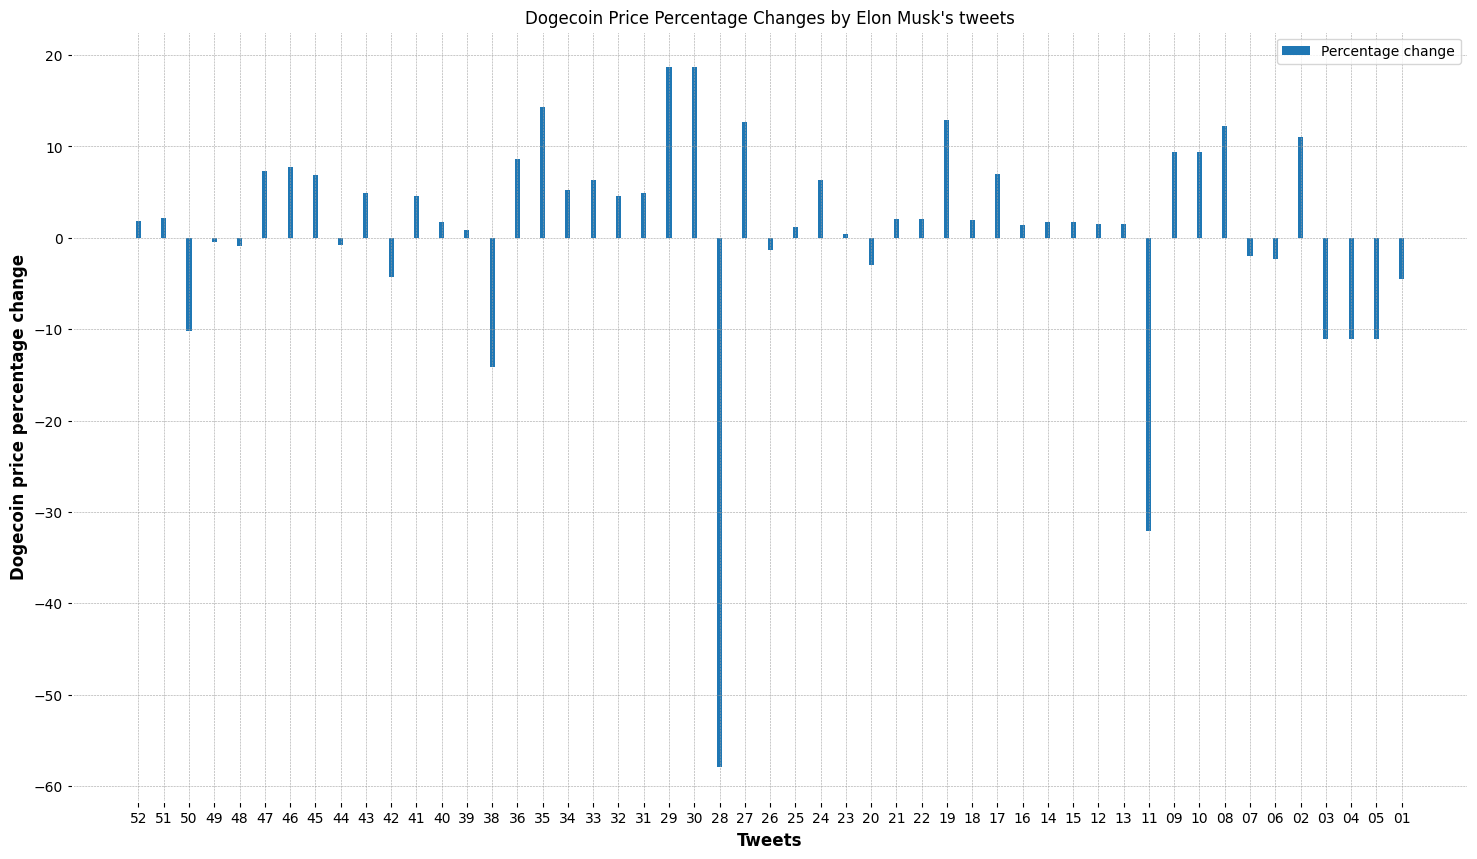

In [36]:
fig, ax = plt.subplots(figsize=(18,10))
width = 0.2
labels = list(map(lambda x: x.replace('tweet', ''), data['Tweet'].values.tolist()))
percentage_change = data['Pct change'].values.tolist()
ax.bar(labels, percentage_change, width, label='Percentage change')
ax.set_ylabel('Dogecoin price percentage change')
ax.set_xlabel('Tweets')
ax. set_title("Dogecoin Price Percentage Changes by Elon Musk's tweets")
ax.legend()
plt.show()

In [37]:
datafile ='53tweets.csv'

In [38]:
raw_data = pd.read_csv(datafile, parse_dates=[0], infer_datetime_format=True)

In [39]:
reindexed_data = raw_data['Tweet']
reindexed_data.index = raw_data['Text']

In [40]:
raw_data.head()


,Tweet,Date,Time,Text
0,tweet01,Dec-02-2017,7:33 pm,"{""Text"":""@highqualitysh1t I love the thought o..."
1,tweet02,Apr-04-2019,10:24 am,"{""Text"":""@Tom_Heats Dogecoin might be my fav c..."
2,tweet03,Apr-02-2019,8:40 pm,"{""Text"":""@dogecoin Uh oh"""
3,tweet04,Apr-02-2019,9:16 pm,"{""Text"":""Dogecoin rulz https://t.co/flWWUgAgLU"""
4,tweet05,Apr-02-2019,9:38 pm,"{""Text"":""Dogecoin value may vary https://t.co/..."


In [41]:
positive_sentence = "dogecoin, doge, dogecoin is for the people, dogecoin is good!"
neutral_sentence = "dogecoin looks okay"
negative_sentence = "dogecoin is bad"

In [42]:
positive_blob = TextBlob(positive_sentence)
neutral_blob = TextBlob(neutral_sentence)
negative_blob = TextBlob(negative_sentence)

In [43]:
print("Positive sentence: ", positive_blob.sentiment)
print("Neutral sentence: ", neutral_blob.sentiment)
print("Negative sentence: ", negative_blob.sentiment)

Positive sentence:  Sentiment(polarity=0.875, subjectivity=0.6000000000000001)
Neutral sentence:  Sentiment(polarity=0.5, subjectivity=0.5)
Negative sentence:  Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)


Stopwords


In [44]:
import io
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
# word_tokenize accepts

stop_words = set(stopwords.words('english'))
file1 = open('data-clensing.csv', encoding= "UTF-8")

In [46]:
line = file1.read()
words = line.split()
for r in words:
    if not r in stop_words:
        appendFile = open('fstop.txt','a', encoding="utf-8")
        appendFile.write(" "+r)
        appendFile.close()



```
Frequency distabution in Tweets collected 

```



In [47]:
import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist

In [48]:
wt_words = open('fstop.txt', encoding= "UTF-8")
mydata = wt_words.read()
# add individual characters you want to get rid of
for c in "#0123456789£!$%^&*'()""';:-_/?><,.@":
    mydata = mydata.replace(c,"")

for w in ["RT", "date", "http"]:
    mydata = mydata.replace(w, "")


data_analysis = nltk.FreqDist(nltk.tokenize.word_tokenize(mydata))

In [49]:
# Let's take the specific words only if their frequency is greater than 10.
filter_words = dict([(m, n) for m, n in data_analysis.items() if n > 50])

In [50]:
filter_words["dogecoin"]


118909

In [ ]:
for key in sorted(filter_words):
    print("%s: %s" % (key, filter_words[key]))

In [52]:
data_analysis

FreqDist({"''": 830580, 'dogecoin': 118909, 'DogelonMars': 82774, 'BabyDogeCoin': 80336, 'Shiba': 71330, '為替': 70400, '米ドル→円': 70400, '香港ドル→円': 70400, '台湾ドル→円': 70400, '中国元→円': 70400, ...})

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28858 (\N{CJK UNIFIED IDEOGRAPH-70BA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26367 (\N{CJK UNIFIED IDEOGRAPH-66FF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31859 (\N{CJK UNIFIED IDEOGRAPH-7C73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core

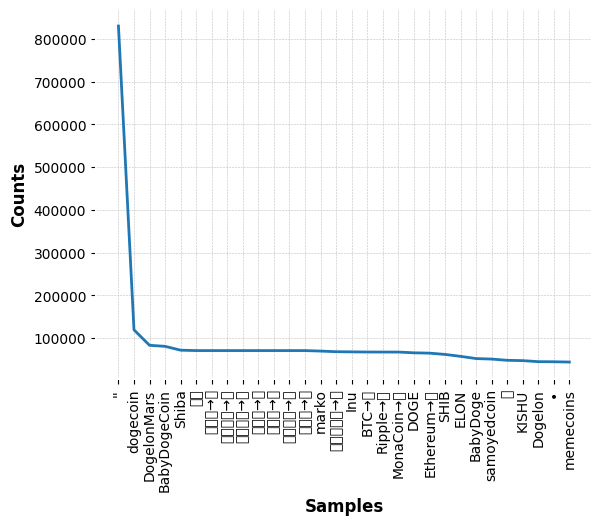

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [53]:
data_analysispost = nltk.FreqDist(filter_words)
 
data_analysispost.plot(30, cumulative=False)


Sentiment Analysis


In [54]:
import numpy as np
import pandas as pd

In [55]:
df = pd.read_csv('data-clensing.csv')

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [56]:
df.shape

(299342, 4)

In [57]:
df.head()

,Date,TweetNo,User,Tweet
0,2022-02-06,1,Filimon1987,RT @hardbitspace: BitTorrent 10000.\nRetweet t...
1,2022-02-06,2,amir_shazrin,RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...
2,2022-02-06,3,umit587,RT @fzthsyn: Tercihini hangi kedilerden yana ...
3,2022-02-06,4,realwhalehacker,"""The FTX ad with Brady had some charm, it's cu..."
4,2022-02-06,5,hasanKylp33,RT @fzthsyn: Tercihini hangi kedilerden yana ...


In [58]:
import re 
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
corpus=[df]

for i in range(46256, 5):
  review = re.sub('[^a-zA-Z]', ' ', df['Tweet'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)


In [60]:
corpus

[              Date TweetNo             User  \
 0       2022-02-06       1      Filimon1987   
 1       2022-02-06       2     amir_shazrin   
 2       2022-02-06       3          umit587   
 3       2022-02-06       4  realwhalehacker   
 4       2022-02-06       5      hasanKylp33   
 ...            ...     ...              ...   
 299337  2022-04-19  299450         marko_55   
 299338  2022-04-19  299451         marko_55   
 299339  2022-04-19  299452         marko_55   
 299340  2022-04-19  299453         marko_55   
 299341  2022-04-19  299454         marko_55   
 
                                                     Tweet  
 0       RT @hardbitspace: BitTorrent 10000.\nRetweet t...  
 1       RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...  
 2       RT @fzthsyn: Tercihini hangi kedilerden yana  ...  
 3       "The FTX ad with Brady had some charm, it's cu...  
 4       RT @fzthsyn: Tercihini hangi kedilerden yana  ...  
 ...                                                   .

In [61]:
#@okex_brasil

In [62]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
#Sentiment Analysis
SA = SentimentIntensityAnalyzer()
df["Tweet"]= df["Tweet"].astype(str)
# Applying Model, Variable Creation
df['Polarity Score']=df["Tweet"].apply(lambda x:SA.polarity_scores(x)['compound'])
df['Neutral Score']=df["Tweet"].apply(lambda x:SA.polarity_scores(x)['neu'])
df['Negative Score']=df["Tweet"].apply(lambda x:SA.polarity_scores(x)['neg'])
df['Positive Score']=df["Tweet"].apply(lambda x:SA.polarity_scores(x)['pos'])


# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment']=''
df.loc[df['Polarity Score']>0,'Sentiment']='Positive'
df.loc[df['Polarity Score']==0,'Sentiment']='Neutral'
df.loc[df['Polarity Score']<0,'Sentiment']='Negative'



df[:100]
#df.to_csv('Sentimental-data.csv')

,Date,TweetNo,User,Tweet,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment
0,2022-02-06,1,Filimon1987,RT @hardbitspace: BitTorrent 10000.\nRetweet t...,0.0000,1.000,0.000,0.000,Neutral
1,2022-02-06,2,amir_shazrin,RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...,0.0000,1.000,0.000,0.000,Neutral
2,2022-02-06,3,umit587,RT @fzthsyn: Tercihini hangi kedilerden yana ...,0.0000,1.000,0.000,0.000,Neutral
3,2022-02-06,4,realwhalehacker,"""The FTX ad with Brady had some charm, it's cu...",0.6908,0.769,0.000,0.231,Positive
4,2022-02-06,5,hasanKylp33,RT @fzthsyn: Tercihini hangi kedilerden yana ...,0.0000,1.000,0.000,0.000,Neutral
...,...,...,...,...,...,...,...,...,...
95,2022-02-06,96,E__dollar,RT @shegzynanah: @W3stSideCryp @marvininu @Mar...,0.6597,0.645,0.089,0.266,Positive
96,2022-02-06,97,HamidJahanfakhr,RT @MemesCoinLover: What is the top #Token com...,0.2023,0.899,0.000,0.101,Positive
97,2022-02-06,98,itnyeinchanko,RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...,0.0000,1.000,0.000,0.000,Neutral
98,2022-02-06,99,rodamus444,RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...,0.0000,1.000,0.000,0.000,Neutral


In [63]:
df.loc[df['Polarity Score']>0,'Sentiment']
df['Date']= pd.to_datetime(df['Date'])
dfagg=df.groupby(by='Date').agg('mean')
dfagg[dfagg['Polarity Score']<0]
#dfagg2=dfagg.iloc[:,[1]]
#dfagg2.to_csv('dfagg2.csv')
dfagg

,Polarity Score,Neutral Score,Negative Score,Positive Score
Date,,,,
2022-02-06,0.259914,0.875484,0.021574,0.103003
2022-02-07,0.215312,0.908980,0.010099,0.080921
2022-02-08,0.149469,0.932775,0.009386,0.057860
2022-02-09,0.289365,0.890400,0.004510,0.105106
2022-02-10,0.193530,0.898696,0.017984,0.082852
...,...,...,...,...
2022-04-15,0.115242,0.939723,0.007418,0.052855
2022-04-16,0.131267,0.919981,0.014627,0.065385
2022-04-17,0.129466,0.920067,0.013948,0.065992


In [64]:
dfagg2=dfagg.iloc[:,[0]]
#dfagg2.to_csv('dfagg2.csv')
dfagg2

,Polarity Score
Date,
2022-02-06,0.259914
2022-02-07,0.215312
2022-02-08,0.149469
2022-02-09,0.289365
2022-02-10,0.193530
...,...
2022-04-15,0.115242
2022-04-16,0.131267
2022-04-17,0.129466


Mering the data from the web scraper and the polarity scores from the daily sentiment


In [65]:
#mergedf = pd.merge(doge, dfagg, on='Date', how='inner')

In [104]:
mergedf = pd.concat([doge, dfagg2], axis=1, sort=True, join='inner')

In [105]:
mergedf

,Open,High,Low,Close,Adj Close,Volume,MarktCap,MA50,MA200,returns,Polarity Score
Date,,,,,,,,,,,
2022-02-06,0.147140,0.154775,0.145258,0.153770,0.153770,757004142,1.113856e+08,NaN,NaN,0.045052,0.259914
2022-02-07,0.153803,0.171586,0.151741,0.165578,0.165578,1791358822,2.755164e+08,NaN,NaN,0.076790,0.215312
2022-02-08,0.165606,0.169145,0.153709,0.158405,0.158405,1190116000,1.970904e+08,NaN,NaN,-0.043321,0.149469
2022-02-09,0.158357,0.160704,0.155035,0.159123,0.159123,778670798,1.233080e+08,NaN,NaN,0.004533,0.289365
2022-02-10,0.159145,0.160437,0.151497,0.151889,0.151889,1053630584,1.676800e+08,NaN,NaN,-0.045462,0.193530
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-12,0.134652,0.144122,0.134243,0.138076,0.138076,1214105682,1.634818e+08,0.130428,NaN,0.025413,0.119733
2022-04-13,0.138070,0.142608,0.137067,0.140080,0.140080,890728707,1.229829e+08,0.130619,NaN,0.014514,0.119920
2022-04-14,0.140053,0.146633,0.138101,0.143920,0.143920,1759067761,2.463627e+08,0.130789,NaN,0.027413,0.167889


In [106]:
mergedf.to_csv('lstm.csv')

plotting all the coins respective of the days the data gathered

In [69]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import yfinance as yf
%matplotlib inline

In [107]:
start = "2022-1-06"
end = '2022-4-19'
doge = yf.download('DOGE-USD',start,end)
mona = yf.download('MONA-USD',start,end)
shib = yf.download('SHIB-USD',start,end)
soma = yf.download('SAMO-USD',start,end)
elon = yf.download('ELON-USD',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Exploratory Analysis

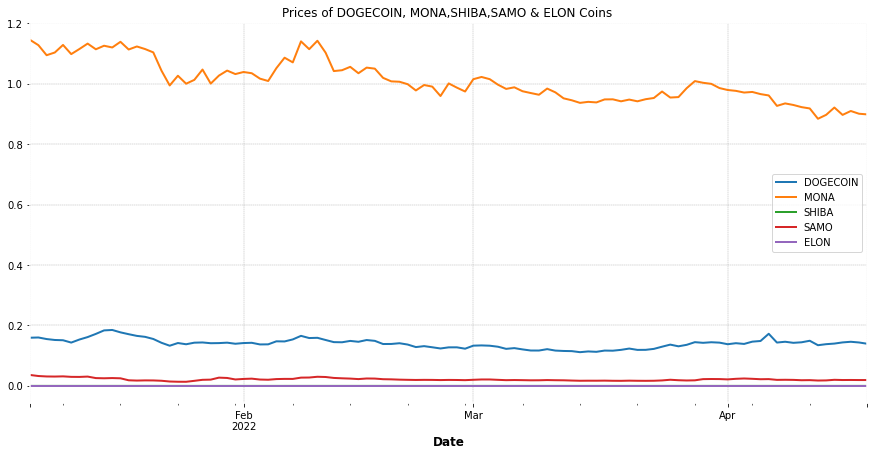

In [108]:
doge['Open'].plot(label = 'DOGECOIN', figsize = (15,7))
mona['Open'].plot(label = 'MONA')
shib['Open'].plot(label = 'SHIBA')
soma['Open'].plot(label = 'SAMO')
elon['Open'].plot(label = 'ELON')
plt.title('Prices of DOGECOIN, MONA,SHIBA,SAMO & ELON Coins ')
plt.legend()

Volume Traded

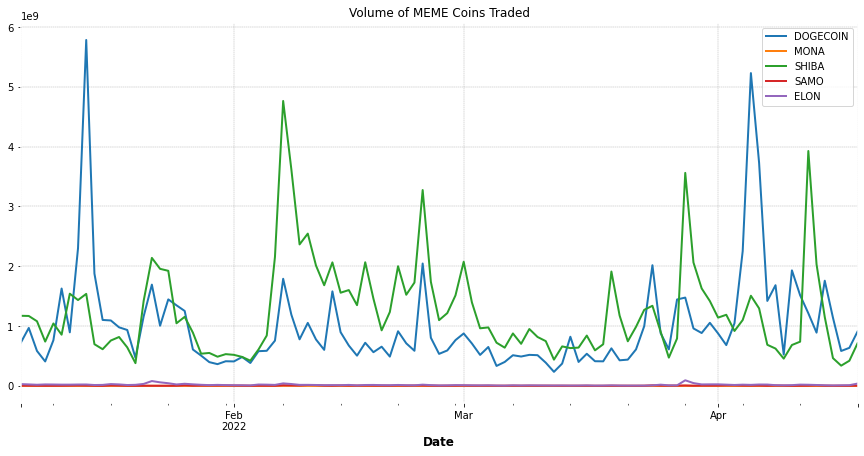

In [109]:
doge['Volume'].plot(label = 'DOGECOIN', figsize = (15,7))
mona['Volume'].plot(label = "MONA")
shib['Volume'].plot(label = 'SHIBA')
soma['Volume'].plot(label = "SAMO")
elon['Volume'].plot(label = 'ELON')
plt.title('Volume of MEME Coins Traded')
plt.legend()

Market Capitalisation

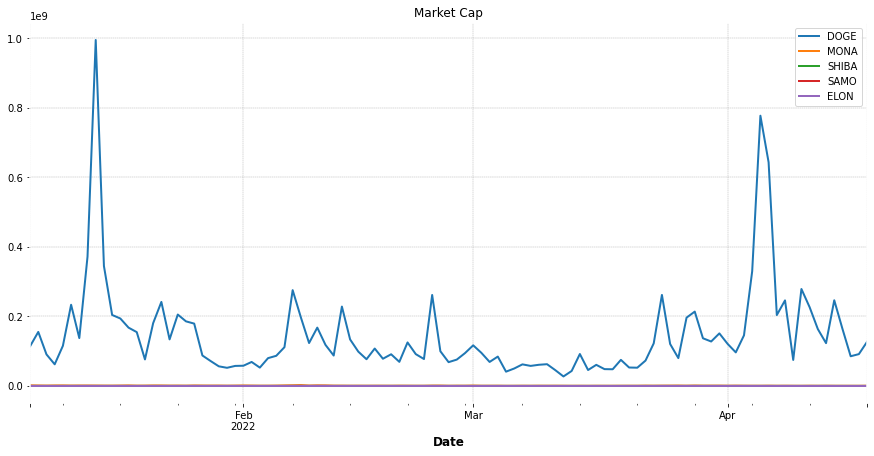

In [110]:
doge['MarktCap'] = doge['Open'] * doge['Volume']
mona['MarktCap'] = mona['Open'] * mona['Volume']
shib['MarktCap'] = shib['Open'] * shib['Volume']
soma['MarktCap'] = soma['Open'] * soma['Volume']
elon['MarktCap'] = elon['Open'] * elon['Volume']
doge['MarktCap'].plot(label = 'DOGE', figsize = (15,7))
mona['MarktCap'].plot(label = 'MONA')
shib['MarktCap'].plot(label = 'SHIBA')
soma['MarktCap'].plot(label = 'SAMO')
elon['MarktCap'].plot(label = 'ELON')
plt.title('Market Cap')
plt.legend()

Moving Average DOGECOIN

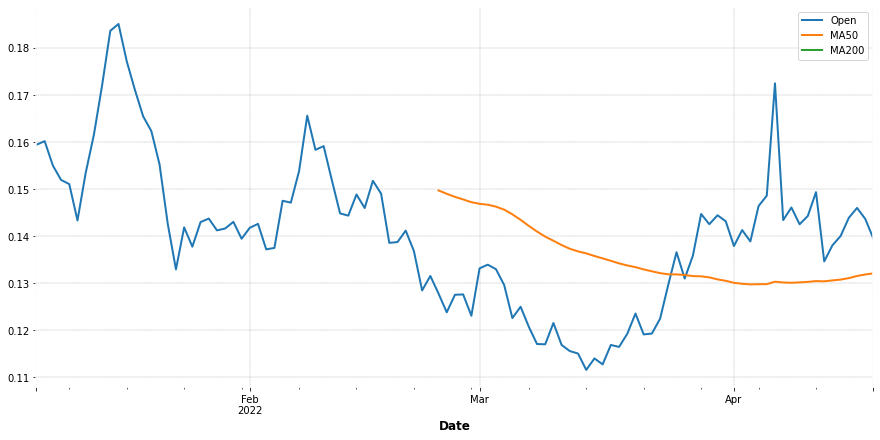

In [111]:
doge['MA50'] = doge['Open'].rolling(50).mean()
doge['MA200'] = doge['Open'].rolling(200).mean()
doge['Open'].plot(figsize = (15,7))
doge['MA50'].plot()
doge['MA200'].plot()
plt.legend()

Percentage increase in Coins value

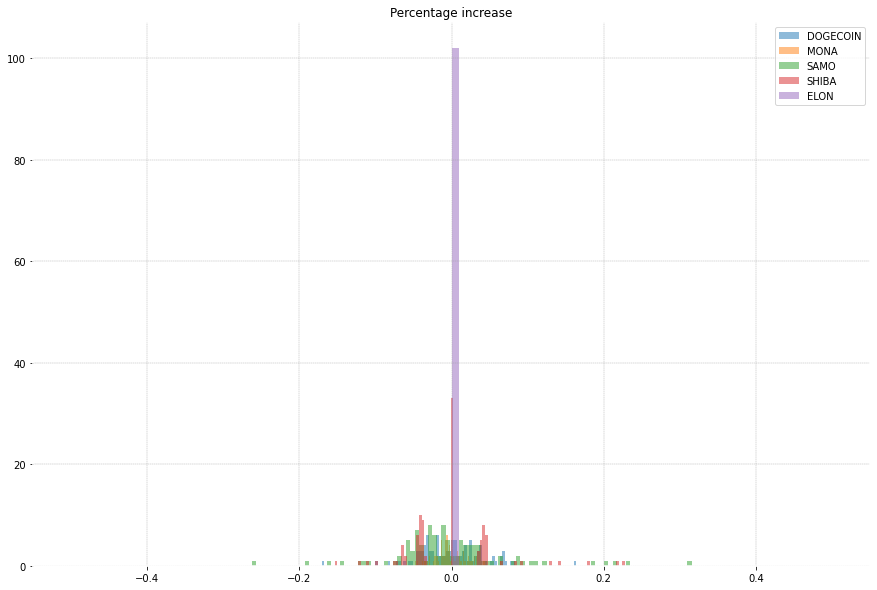

In [112]:
doge['returns'] = (doge['Close']/doge['Close'].shift(1)) -1
mona['returns'] = (mona['Close']/mona['Close'].shift(1))-1
soma['returns'] = (soma['Close']/soma['Close'].shift(1)) - 1
shib['returns'] = (shib['Close']/shib['Close'].shift(1))-1
elon['returns'] = (elon['Close']/elon['Close'].shift(1)) - 1
doge['returns'].hist(bins = 100, label = 'DOGECOIN', alpha = 0.5, figsize = (15,10))
mona['returns'].hist(bins = 100, label = 'MONA', alpha = 0.5)
soma['returns'].hist(bins = 100, label = 'SAMO', alpha = 0.5)
shib['returns'].hist(bins = 100, label = 'SHIBA', alpha = 0.5)
elon['returns'].hist(bins = 100, label = 'ELON', alpha = 0.5)
plt.title('Percentage increase')
plt.legend()

LSTM testing 

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pandas_datareader.data as web

In [113]:
Doge = web.DataReader('DOGE-USD','yahoo',start ='2019-01-01',end = '2022-04-19')

In [114]:
Doge.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-15,0.149287,0.142767,0.143917,0.146026,1140382087,0.146026
2022-04-16,0.147811,0.142093,0.146017,0.143712,584019179,0.143712
2022-04-17,0.144709,0.138995,0.143693,0.139459,636442285,0.139459
2022-04-18,0.140461,0.134384,0.139471,0.140286,909718484,0.140286
2022-04-19,0.141219,0.139500,0.140275,0.139682,666435968,0.139682


In [116]:
Doge.shape

(1205, 6)

In [117]:
#data = Doge.to_csv('LSTMdoge.csv')


In [118]:
data = pd.read_csv('LSTMdoge.csv',date_parser = True)


In [119]:
data.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
1200,2022-04-15,0.149287,0.142767,0.143917,0.146026,1140382087,0.146026
1201,2022-04-16,0.147811,0.142093,0.146017,0.143712,584019179,0.143712
1202,2022-04-17,0.144709,0.138995,0.143693,0.139459,636442285,0.139459
1203,2022-04-18,0.140461,0.134384,0.139471,0.140286,909718484,0.140286
1204,2022-04-19,0.141219,0.139500,0.140275,0.139682,666435968,0.139682


In [120]:
data.shape


(1205, 7)

In [121]:
data_training = data[data['Date']<'2022-01-01'].copy()
data_test = data[data['Date']>='2022-01-01'].copy()

In [122]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [123]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[1.05984740e-03, 1.77123551e-03, 1.17448021e-03, 1.25139055e-03,
        7.99973571e-05],
       [1.14952685e-03, 1.85361841e-03, 1.23568154e-03, 1.27334460e-03,
        8.93728415e-05],
       [1.08974044e-03, 1.82725602e-03, 1.25899612e-03, 1.20455487e-03,
        8.36644198e-05],
       ...,
       [2.38774111e-01, 2.72709292e-01, 2.51442241e-01, 2.43293720e-01,
        1.16978179e-02],
       [2.36643540e-01, 2.70437170e-01, 2.42760405e-01, 2.48486619e-01,
        8.46445733e-03],
       [2.35995401e-01, 2.73610573e-01, 2.47394206e-01, 2.47290844e-01,
        9.11547547e-03]])

In [124]:
X_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [125]:
data_training.shape

(1096, 5)

In [126]:
X_train.shape

(1036, 60, 5)

In [127]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [128]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [129]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 60)            15840     
                                                                 
 dropout_4 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_5 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_6 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [130]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=1, batch_size=32)

33/33 [==============================] - 8s 113ms/step - loss: 0.0151


In [131]:
data_test.head()

,Date,High,Low,Open,Close,Volume,Adj Close
1096,2022-01-01,0.173423,0.170353,0.170510,0.173035,371336089,0.173035
1097,2022-01-02,0.175989,0.171201,0.173027,0.174403,391041933,0.174403
1098,2022-01-03,0.174406,0.168271,0.174406,0.170088,505900382,0.170088
1099,2022-01-04,0.172339,0.168128,0.170151,0.168803,541922892,0.168803
1100,2022-01-05,0.170747,0.151898,0.168835,0.159420,994086848,0.159420


In [132]:
past_60_days = data_test.tail(60)

In [133]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,0.145906,0.138751,0.138764,0.141206,655782652
1,0.141197,0.135852,0.141197,0.136868,490138547
2,0.141345,0.128246,0.136838,0.128490,913773124
3,0.131696,0.125365,0.128488,0.131553,711967119
4,0.135337,0.127846,0.131561,0.127846,587472906


In [134]:
inputs = scaler.transform(df)
inputs

array([[0.19606362, 0.22655996, 0.1999589 , 0.20442157, 0.00927925],
       [0.18966512, 0.22178338, 0.2035042 , 0.19807241, 0.00689241],
       [0.18986622, 0.20925128, 0.1971524 , 0.18581025, 0.01299676],
       [0.17675537, 0.20450438, 0.18498502, 0.19029329, 0.01008884],
       [0.18170268, 0.20859222, 0.18946289, 0.18486769, 0.00829495],
       [0.17153086, 0.17845485, 0.18401308, 0.17896493, 0.02931841],
       [0.17197926, 0.19728432, 0.17821645, 0.1844725 , 0.01143171],
       [0.17454735, 0.20587853, 0.18364442, 0.18457642, 0.00754714],
       [0.17205263, 0.19904732, 0.18374787, 0.17793747, 0.00837184],
       [0.18053685, 0.1988842 , 0.17716   , 0.19263948, 0.01086391],
       [0.18495424, 0.21290251, 0.19181332, 0.19378402, 0.01246118],
       [0.18289434, 0.21417119, 0.19296449, 0.19239652, 0.01005381],
       [0.17940907, 0.20853291, 0.19155686, 0.1874495 , 0.00729667],
       [0.17425522, 0.19820867, 0.18665056, 0.17717638, 0.00920552],
       [0.16816653, 0.1982548 , 0.

In [135]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((109, 60, 5), (109,))

In [136]:
y_pred = regressor.predict(X_test)

In [137]:
scaler.scale_

array([1.35877872e+00, 1.64766088e+00, 1.45717154e+00, 1.46361450e+00,
       1.44094570e-11])

In [138]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [139]:
y_pred = y_pred*scale
y_test = y_test*scale

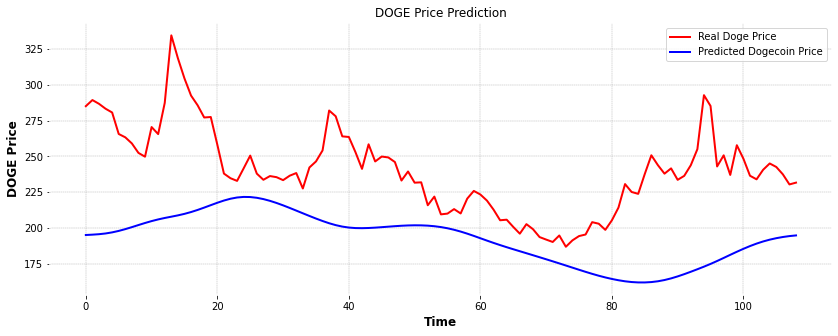

In [140]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Doge Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Dogecoin Price')
plt.title('DOGE Price Prediction')
plt.xlabel('Time')
plt.ylabel('DOGE Price')
plt.legend()
plt.show()